In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import math


def sigmoid(x):
  return 1/(1+np.exp(-x))

def cost(X, y, v, w):
    m = X.shape[0]
    n = len(v)
    cost = 0.0
    for i in range(m):
        h_i = []
        for j in range(n):
            h_i.append(sigmoid(v[j].dot(X[i])))
        z_i = w.dot(h_i)
        fwi = sigmoid(z_i)
        cost += (fwi-y[i])**2
    return cost/m

def w_derivative(X, y, v, w, val): 
    m = X.shape[0]
    n = len(v)
    dw = 0 
    for i in range(m):
        z_i = 0
        for j in range(n):
            z_i += w[j]*sigmoid(v[j].dot(X[i]))
        fwi = sigmoid(z_i)
        dw += 2*(fwi - y[i])*fwi*(1-fwi)*sigmoid(np.dot(v[val],X[i])) 
    return dw/m

def v_derivative(X, y, v, w, val): 
    m = X.shape[0]
    n = len(v)
    dv = 0 
    for i in range(m):
        z_i = 0
        for j in range(n):
            z_i += w[j]*sigmoid(v[j].dot(X[i]))
        fwi = sigmoid(z_i)
        dv += 2*(fwi - y[i])*fwi*(1-fwi)*w[val]*sigmoid(v[val].dot(X[i]))*(1-sigmoid(v[val].dot(X[i])))*X[i] 
    return dv/m

def gradient(X, y, v, w, eta, iters): 
    cost_history = []
    for i in range(iters):
        dw = []
        for j in range(len(v)):
            dw.append(w_derivative(X, y, v, w, j))
        for j in range(len(v)):
            w[j] = w[j] - eta * dw[j]
        dv = []
        for j in range(len(v)):
            dv.append(v_derivative(X, y, v, w, j))
        for j in range(len(v)):
            v[j] = v[j] - eta * dv[j]   

        cost_history.append(cost(X, y, v, w))
            
    print("Loss = ", cost_history[-1])
    return v, w, cost_history

In [2]:
data = pd.read_csv("election_dataset.csv")
y = data['clinton_win'].values

data = data.drop("clinton_win", axis=1)
data = data.drop("state", axis=1)
data = data.drop("county_name", axis=1)

data = (data-data.min())/(data.max()-data.min())
x = np.array(data[['median_age', 'mean_savings', 'per_capita_income', 'population_density', 'percent_in_nursing_homes', 'crime_index_PC', 'mean_savings', 'percent_in_poverty', 'percent_female']])

In [3]:
w = np.zeros(2)
v = np.empty(shape=(2,x.shape[1]))
v.fill(0)
V, W, loss1 = gradient(x, y, v, w, 0.01, 1000)

Loss =  0.24997765476429587


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


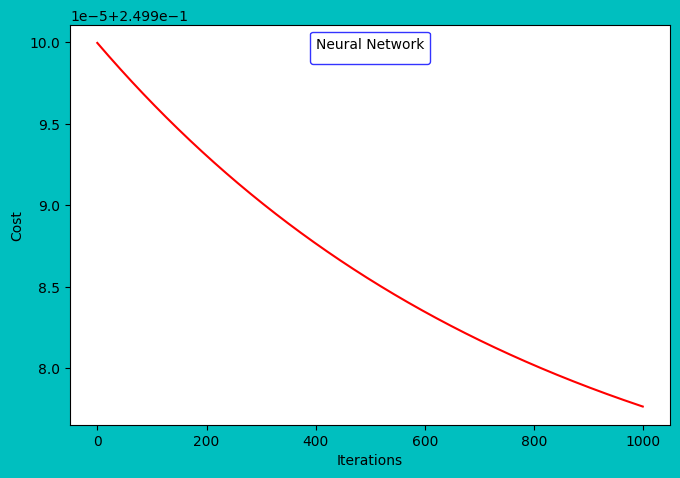

In [4]:
figure = plt.figure(figsize=[6,4],facecolor="c",edgecolor="black",dpi=100)
axis = figure.add_axes([0,0,1,1],projection="rectilinear",xlabel="Iterations",ylabel="Cost",facecolor="w")
plt.plot(np.arange(1000),loss1,color='r')
plt.legend(facecolor='white',loc='upper center', edgecolor='b', title='Neural Network')

In [5]:
w = np.random.rand(2)
v = np.empty(shape=(2,x.shape[1]))
v.fill(np.random.rand())
V, W, loss2 = gradient(x, y, v, w, 0.01, 1000)

Loss =  0.25092830991023557


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


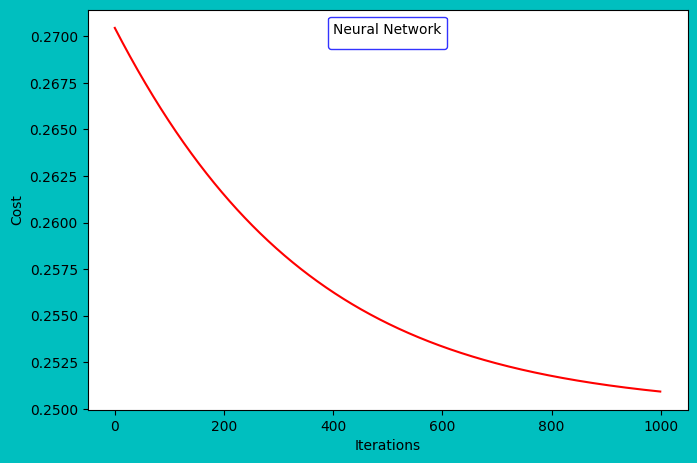

In [6]:
figure = plt.figure(figsize=[6,4],facecolor="c",edgecolor="black",dpi=100)
axis = figure.add_axes([0,0,1,1],projection="rectilinear",xlabel="Iterations",ylabel="Cost",facecolor="w")
plt.plot(np.arange(1000),loss2,color='r')
plt.legend(facecolor='white',loc='upper center', edgecolor='b', title='Neural Network')

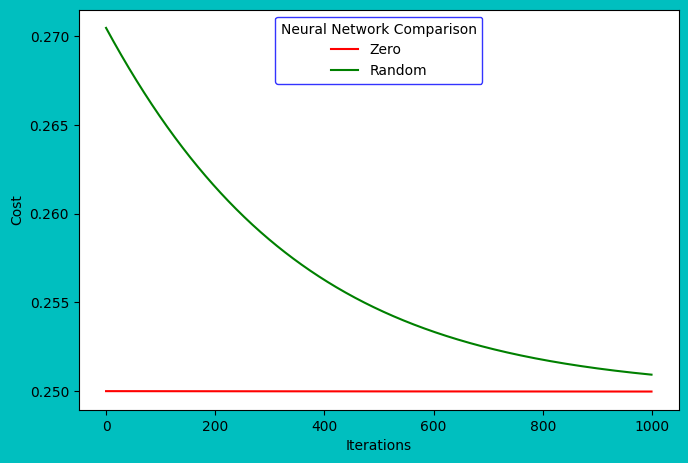

In [7]:
figure = plt.figure(figsize=[6,4],facecolor="c",edgecolor="black",dpi=100)
axis = figure.add_axes([0,0,1,1],projection="rectilinear",xlabel="Iterations",ylabel="Cost",facecolor="w")
plt.plot(np.arange(1000),loss1,color='r')
plt.plot(np.arange(1000),loss2,color='g')
plt.legend(['Zero','Random'],facecolor='white',loc='upper center', edgecolor='b', title='Neural Network Comparison')

In [8]:
w = np.random.rand(2)
v = np.empty(shape=(2,x.shape[1]))
v.fill(np.random.rand())

V, W, l1 = gradient(x, y, v, w, 0.1, 1000)
V, W, l2 = gradient(x, y, v, w, 0.05, 1000)
V, W, l3 = gradient(x, y, v, w, 0.01, 1000)
V, W, l4 = gradient(x, y, v, w, 0.005, 1000)
V, W, l5 = gradient(x, y, v, w, 0.001, 1000)

Loss =  0.2499703563380667
Loss =  0.24996273929814214
Loss =  0.24996109908194447
Loss =  0.24996026165476606
Loss =  0.24996009272787958


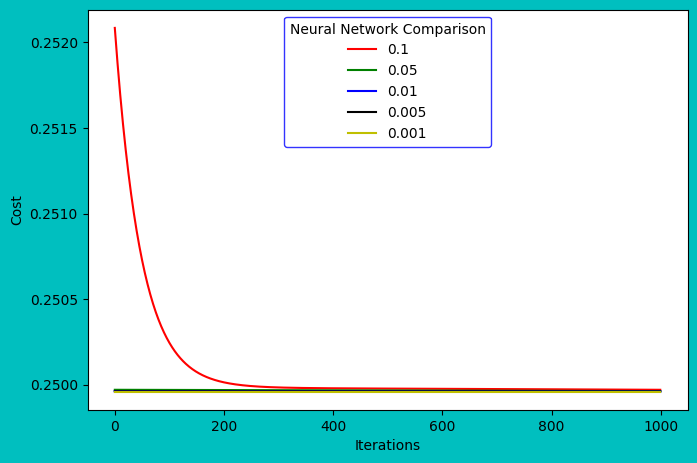

In [9]:
figure = plt.figure(figsize=[6,4],facecolor="c",edgecolor="black",dpi=100)
axis = figure.add_axes([0,0,1,1],projection="rectilinear",xlabel="Iterations",ylabel="Cost",facecolor="w")
plt.plot(np.arange(1000),l1,color='r')
plt.plot(np.arange(1000),l2,color='g')
plt.plot(np.arange(1000),l3,color='b')
plt.plot(np.arange(1000),l4,color='black')
plt.plot(np.arange(1000),l5,color='y')
plt.legend(['0.1','0.05','0.01','0.005','0.001'],facecolor='white',loc='upper center', edgecolor='b', title='Neural Network Comparison')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x = X_train
y = y_train

In [22]:
V, W, l = gradient(x, y, v, w, 0.1, 1000)
W

Loss =  0.249885530412122


array([-0.13495914,  0.1711002 ])

In [23]:
def prediction(x, v, w):
    res = []
    m = len(x)
    n = len(v)
    for i in range(m):
        h_i = []
        for j in range(n):
            h_i.append(sigmoid(v[j].dot(x[i])))
        fw = sigmoid(w.dot(h_i))
        if fw>= 0.5:
            res.append(1)
        else:
            res.append(0)
    return res

In [24]:
results = prediction(X_test, V, W)
accuracy_score(y_test, results)

0.453416149068323